In [1]:
!wget -O manilyn.jpg /home/jack/Documents/MISC/100_0571.JPG

/home/jack/Documents/MISC/100_0571.JPG: Scheme missing.


In [2]:
from PIL import Image
im=Image.open('/home/jack/Documents/MISC/100_0571.JPG')
im.size # (width,height) tuple

(3664, 2062)

In [3]:
import PIL
from PIL import Image

basewidth = 750
img = Image.open("/home/jack/Documents/MISC/100_0571.JPG")
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save("manilyn.jpg")

In [ ]:
http://stackoverflow.com/questions/6136588/image-cropping-using-python

In [ ]:
http://2017.compciv.org/guide/topics/python-nonstandard-libraries/pillow.html

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
!wget https://static.pexels.com/photos/60013/desert-drought-dehydrated-clay-soil-60013.jpeg

--2017-06-10 16:50:50--  https://static.pexels.com/photos/60013/desert-drought-dehydrated-clay-soil-60013.jpeg
Resolving static.pexels.com (static.pexels.com)... 104.16.242.112, 104.16.241.112, 104.16.240.112, ...
Connecting to static.pexels.com (static.pexels.com)|104.16.242.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 868458 (848K)
Saving to: ‘desert-drought-dehydrated-clay-soil-60013.jpeg’

desert-drought-dehy 100%[===================>] 848.10K  80.1KB/s    in 9.5s    

2017-06-10 16:51:06 (89.4 KB/s) - ‘desert-drought-dehydrated-clay-soil-60013.jpeg’ saved [868458/868458]



In [2]:
from PIL import Image
im=Image.open('desert-drought-dehydrated-clay-soil-60013.jpeg')
im.size # (width,height) tuple

(2200, 1500)

In [2]:
import PIL
from PIL import Image

basewidth = 650
img = Image.open("desert-drought-dehydrated-clay-soil-60013.jpeg")
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save("resized-desert.jpg")

In [3]:
from PIL import Image
im=Image.open("resized-desert.jpg")
im.size # (width,height) tuple

(650, 443)

In [4]:
def add_cursor(fig, ax):
    plt.close(fig)

    vline = ax.axvline(1, color='k')
    hline = ax.axhline(0.5, color='k')

    def set_cursor(x, y):
        vline.set_xdata((x, x))
        hline.set_ydata((y, y))
        display(fig)

    interact(set_cursor, x=ax.get_xlim(), y=ax.get_ylim())

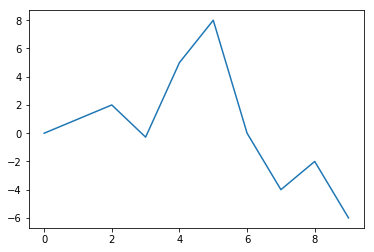

In [2]:
#import ipympl
from math import sin
import matplotlib.pyplot as plt
%matplotlib inline 
x = (sin(6))
plt.plot([0, 1, 2, x, 5, 8,0,-4, -2, -6])
plt.show()


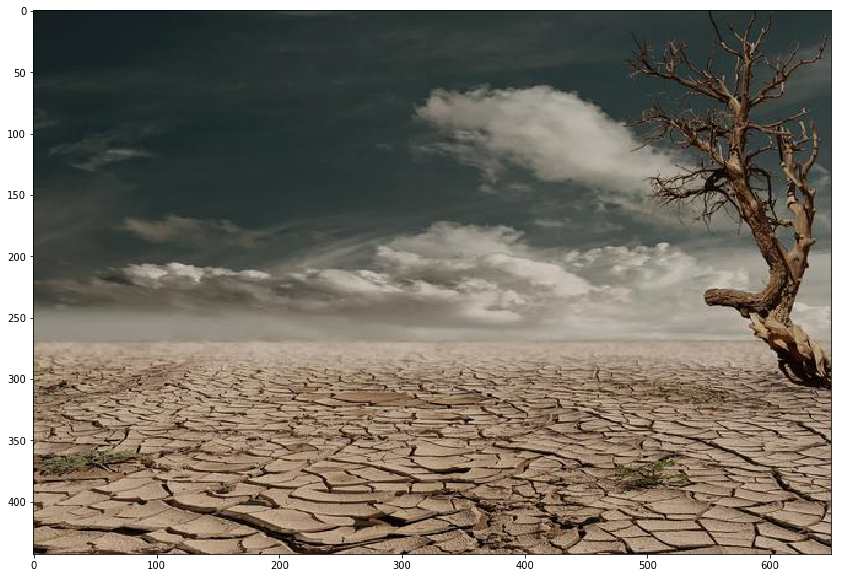

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import matplotlib.image as mpimg
import numpy as np
img=mpimg.imread('resized-desert.jpg')
imgplot = plt.imshow(img)


In [7]:
from PIL import Image
img = Image.open('resized-desert.jpg')
crop_specs = (145, 50, img.width - 40, img.height - 135)
crop_img = img.crop(crop_specs)
crop_img.save('newimage.png')   

img=mpimg.imread('newimage.png')
imgplot = plt.imshow(img)

In [8]:
from PIL import Image
im=Image.open('newimage.png')
im.size # (width,height) tuple

(465, 258)

In [ ]:
http://mpld3.github.io/

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.path as mpath
import matplotlib.patches as mpatches

import mpld3
from mpld3 import plugins, utils


class LinkedDragPlugin(plugins.PluginBase):
    JAVASCRIPT = r"""
    mpld3.register_plugin("drag", DragPlugin);
    DragPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    DragPlugin.prototype.constructor = DragPlugin;
    DragPlugin.prototype.requiredProps = ["idpts", "idline", "idpatch"];
    DragPlugin.prototype.defaultProps = {}
    function DragPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    DragPlugin.prototype.draw = function(){
        var patchobj = mpld3.get_element(this.props.idpatch, this.fig);
        var ptsobj = mpld3.get_element(this.props.idpts, this.fig);
        var lineobj = mpld3.get_element(this.props.idline, this.fig);

        var drag = d3.behavior.drag()
            .origin(function(d) { return {x:ptsobj.ax.x(d[0]),
                                          y:ptsobj.ax.y(d[1])}; })
            .on("dragstart", dragstarted)
            .on("drag", dragged)
            .on("dragend", dragended);

        lineobj.path.attr("d", lineobj.datafunc(ptsobj.offsets));
        patchobj.path.attr("d", patchobj.datafunc(ptsobj.offsets,
                                                  patchobj.pathcodes));
        lineobj.data = ptsobj.offsets;
        patchobj.data = ptsobj.offsets;

        ptsobj.elements()
           .data(ptsobj.offsets)
           .style("cursor", "default")
           .call(drag);

        function dragstarted(d) {
          d3.event.sourceEvent.stopPropagation();
          d3.select(this).classed("dragging", true);
        }

        function dragged(d, i) {
          d[0] = ptsobj.ax.x.invert(d3.event.x);
          d[1] = ptsobj.ax.y.invert(d3.event.y);
          d3.select(this)
            .attr("transform", "translate(" + [d3.event.x,d3.event.y] + ")");
          lineobj.path.attr("d", lineobj.datafunc(ptsobj.offsets));
          patchobj.path.attr("d", patchobj.datafunc(ptsobj.offsets,
                                                    patchobj.pathcodes));
        }

        function dragended(d, i) {
          d3.select(this).classed("dragging", false);
        }
    }

    mpld3.register_plugin("drag", DragPlugin);
    """

    def __init__(self, points, line, patch):
        if isinstance(points, mpl.lines.Line2D):
            suffix = "pts"
        else:
            suffix = None

        self.dict_ = {"type": "drag",
                      "idpts": utils.get_id(points, suffix),
                      "idline": utils.get_id(line),
                      "idpatch": utils.get_id(patch)}


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices[:-1])
points = ax.plot(x, y, 'go', ms=10)
line = ax.plot(x, y, '-k')

ax.grid(True, color='gray', alpha=0.5)
ax.axis('equal')
ax.set_title("Drag Points to Change Path", fontsize=18)

plugins.connect(fig, LinkedDragPlugin(points[0], line[0], patch))

mpld3.display()

import matplotlib.pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins

fig, ax = plt.subplots()

x = np.linspace(-2, 2, 20)
y = x[:, None]
X = np.zeros((20, 20, 4))

X[:, :, 0] = np.exp(- (x - 1) ** 2 - (y) ** 2)
X[:, :, 1] = np.exp(- (x + 0.71) ** 2 - (y - 0.71) ** 2)
X[:, :, 2] = np.exp(- (x + 0.71) ** 2 - (y + 0.71) ** 2)
X[:, :, 3] = np.exp(-0.25 * (x ** 2 + y ** 2))

im = ax.imshow(X, extent=(10, 20, 10, 20),
               origin='lower', zorder=1, interpolation='nearest')
fig.colorbar(im, ax=ax)

ax.set_title('An Image', size=20)

plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()


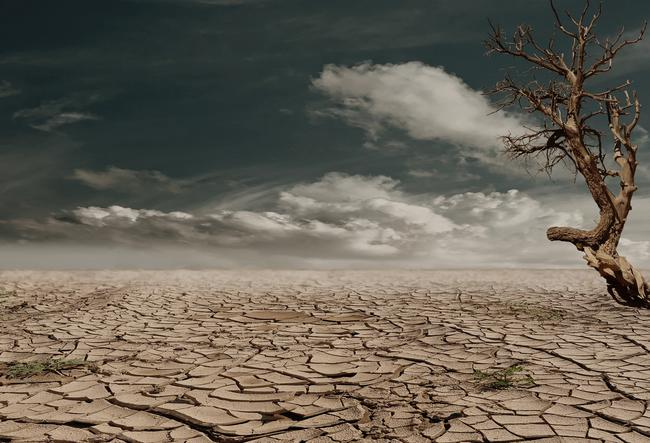

In [9]:
class ImageFile(object):
    """Class for storing an image location."""
    def __init__(self, fpath):
        self.fpath = fpath
    def _repr_png_(self):
        return open(self.fpath, 'r').read()
ImageFile('resized-desert.jpg')

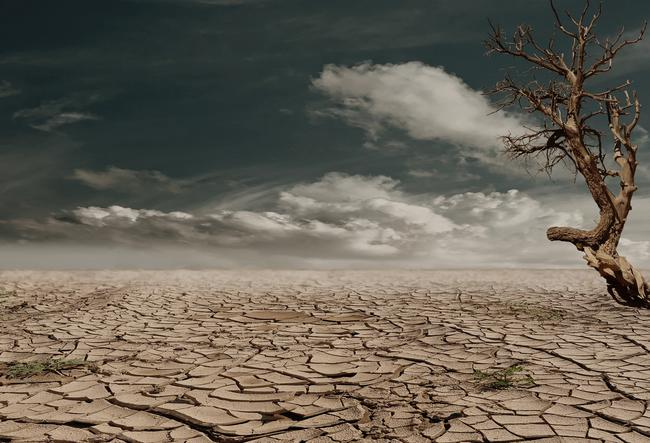

In [10]:
from IPython.display import Image
image = Image('resized-desert.jpg')
image


In [11]:
class ImageFile(object):
    """Class for storing an image location."""

    def __init__(self, fpath):
        self.fpath = fpath
        self.format = fpath.split('.')[-1]

    def _repr_png_(self):
        if self.format == 'png':
            return open(self.fpath, 'r').read()

    def _repr_jpeg_(self):
        if self.format == 'jpeg' or self.format == 'jpg':
            return open(self.fpath, 'r').read()

    def _repr_svg_(self):
        if self.format == 'svg':
            return open(self.fpath, 'r').read()



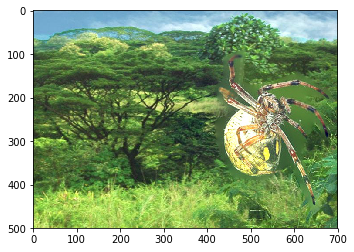

In [5]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

im = np.array(Image.open('01-cloning-example3.jpg'))
plt.imshow(im)
plt.show()

In [14]:
!conda install --yes mpld3

Fetching package metadata .........
Solving package specifications: ..........

Package plan for installation in environment /opt/conda/envs/python2:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    qt-5.6.2                   |                2        44.7 MB  conda-forge
    pyqt-5.6.0                 |           py27_3         5.1 MB  conda-forge
    mpld3-0.3                  |           py27_0         120 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        50.0 MB

The following NEW packages will be INSTALLED:

    mpld3: 0.3-py27_0   conda-forge
    pyqt:  5.6.0-py27_3 conda-forge
    qt:    5.6.2-2      conda-forge

Fetching packages ...
qt-5.6.2-2.tar 100% |################################| Time: 0:06:20 123.30 kB/s
pyqt-5.6.0-py2 100% |################################| Time: 0:00:30 174.93 kB/s


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3
%matplotlib inline  
from mpld3 import plugins
from PIL import Image
#img=Image.open("clockface.png")
 

fig, ax = plt.subplots()
#im = ax.imshow(X, extent=(10, 20, 10, 20),
#               origin='lower', zorder=1, interpolation='nearest')

plugins.connect(fig, plugins.MousePosition(fontsize=14))
mpld3.display()
#from PIL import Image


#im = np.array(Image.open('clockface.png'))



In [4]:
import matplotlib
import numpy as np
import mpld3
import matplotlib.pyplot as plt
from PIL import Image
from mpld3 import plugins
%matplotlib inline
fig, ax = plt.subplots()
im = np.array(Image.open('manilyn.jpg'))
plt.imshow(im)
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()

In [7]:
from PIL import Image
img = Image.open('manilyn.jpg')
crop_specs = (200, 0, img.width - 150, img.height - 0)
crop_img = img.crop(crop_specs)
crop_img.save('newimage.png')   

In [8]:
import matplotlib
import numpy as np
import mpld3
import matplotlib.pyplot as plt
from PIL import Image
from mpld3 import plugins
%matplotlib inline
fig, ax = plt.subplots()
im = np.array(Image.open('newimage.png'))
plt.imshow(im)
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()

In [5]:
#Python 2.7 - Linux
from PIL import Image
# open an image file (.jpg or.png)
im1 = Image.open("images/face_300.jpg")
# multiply each pixel by a variable - less than 1 is darker greater than 1 is lighter
# works best with .jpg and .png images
im2 = im1.point(lambda p: p * 1.8) # lighter
im3 = im1.point(lambda p: p * .5)  # Darker

# This pops up your defaultimage viewer
im1.show()
im2.show()
im3.show()
# save modified image 
#im2.save("images/face_300-light.jpg")
#im2.save("images/face_300-dark.jpg")


In [1]:
import matplotlib
import numpy as np
import mpld3
import matplotlib.pyplot as plt
from PIL import Image
from mpld3 import plugins
%matplotlib inline
fig, ax = plt.subplots()
im = np.array(Image.open('images/face.jpg'))
plt.imshow(im)
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()

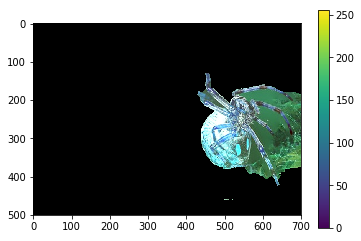

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('01-cloning-example3.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (425,107,686,454)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3
#%matplotlib inline  
from mpld3 import plugins
from PIL import Image

fig, ax = plt.subplots()


plugins.connect(fig, plugins.MousePosition(fontsize=14))
mpld3.display()

# -----------------------------------------------

In [48]:
import PIL
from PIL import Image
im1 = Image.open("ajungle.jpg")
#longer_side = max(im1.size)
basewidth = 700
hsize = 500
img = im1.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save("01-ajungle2.jpg")

# Gives a popup window Points Clicked will be recorded

In [9]:
import Tkinter
from PIL import Image, ImageTk
from sys import argv

window = Tkinter.Tk(className="bla")

image = Image.open("noses/S00097.jpg")
canvas = Tkinter.Canvas(window, width=image.size[0], height=image.size[1])
canvas.pack()
image_tk = ImageTk.PhotoImage(image)
canvas.create_image(image.size[0]//2, image.size[1]//2, image=image_tk)

def callback(event):
    #print "[",event.x,"],["+event.y,"]"
    print "[",event.x,",",event.y,"],"
 
canvas.bind("<Button-1>", callback)
Tkinter.mainloop()

[ 5 , 61 ],
[ 25 , 34 ],
[ 73 , 31 ],
[ 97 , 51 ],
[ 82 , 78 ],
[ 46 , 87 ],
[ 4 , 63 ],


In [ ]:
poly = np.array([ [736, 113],[768, 97],[784, 93],[788, 157],[789, 197],[788, 225],[777, 265],[768, 301],[778, 318],\
[794, 332],[767, 386],[743, 348],[707, 314],[693, 304],[666, 299],[668, 275],[705, 273],[729, 272],\
[716, 223],[706, 236],[689, 207],[687, 217],[687, 231],[667, 217],[647, 226],[629, 208],[614, 207],\
[615, 198],[602, 183],[607, 174],[609, 159],[636, 162],[640, 146],[634, 137],[597, 153],[594, 137],\
[601, 122],[583, 115],[611, 83],[626, 78],[622, 72],[589, 73],[583, 51],[591, 13],[605, 10],[631, 28],\
[650, 17],[666, 39],[681, 18],[699, 4],[728, 6],[751, 7],[743, 39],[794, 13],[797, 42],[764, 66],\
[735, 101],[786, 89] ], np.int32)


## USING those " Points Clicked "

In [3]:
import cv2
import numpy as np 

# Read images
dst = cv2.imread("man.jpg")
#dst = cv2.imread("/notebooks/edge-preserving-normalized-convolution-filter.jpg")
#src = cv2.imread("/notebooks/learnopencv/SeamlessCloning/images/airplane.jpg")
src = cv2.imread("noses/S000005.jpg")
src_mask = np.zeros(src.shape, src.dtype)
# Create a rough mask around the airplane.
src_mask = np.zeros(src.shape, src.dtype)
#poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
#poly = np.array([ [1,100], [1,50], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
poly = np.array([ [151 , 9],[73 , 60],[73 , 125],[166 , 139],[225, 121],[241, 89],[231, 50],[158, 8] ], np.int32)




cv2.fillPoly(src_mask, [poly], (255, 255, 255))

# This is where the CENTER of the airplane will be placed
center = (550,275)

# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

# Write result
cv2.imwrite("man-nose.jpg", output);


In [52]:
import cv2
import numpy as np 

# Read images
dst = cv2.imread("01-ajungle2.jpg")
#dst = cv2.imread("/notebooks/edge-preserving-normalized-convolution-filter.jpg")
#src = cv2.imread("/notebooks/learnopencv/SeamlessCloning/images/airplane.jpg")
src = cv2.imread("desert-drought.jpg")


# Create a rough mask around the airplane.
src_mask = np.zeros(src.shape, src.dtype)
#poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
#poly = np.array([ [1,100], [1,50], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
poly = np.array([ [736, 113],[768, 97],[784, 93],[788, 157],[789, 197],[788, 225],[777, 265],[768, 301],[778, 318],\
[794, 332],[767, 386],[743, 348],[707, 314],[693, 304],[666, 299],[668, 275],[705, 273],[729, 272],\
[716, 223],[706, 236],[689, 207],[687, 217],[687, 231],[667, 217],[647, 226],[629, 208],[614, 207],\
[615, 198],[602, 183],[607, 174],[609, 159],[636, 162],[640, 146],[634, 137],[597, 153],[594, 137],\
[601, 122],[583, 115],[611, 83],[626, 78],[622, 72],[589, 73],[583, 51],[591, 13],[605, 10],[631, 28],\
[650, 17],[666, 39],[681, 18],[699, 4],[728, 6],[751, 7],[743, 39],[794, 13],[797, 42],[764, 66],\
[735, 101],[736, 113] ], np.int32)




cv2.fillPoly(src_mask, [poly], (255, 255, 255))

# This is where the CENTER of the airplane will be placed
center = (550,275)

# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

# Write result
cv2.imwrite("01-cloning-example3.jpg", output);


# --------------------------------------------------------

/home/jack/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


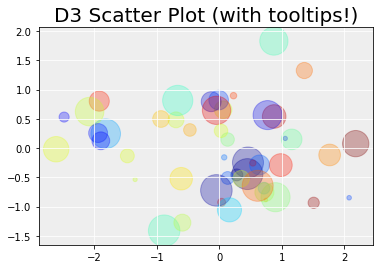

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3

mpld3.enable_notebook()
from mpld3 import plugins

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = 50
scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s = 1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)

ax.set_title("D3 Scatter Plot (with tooltips!)", size=20)

labels = ['point {0}'.format(i + 1) for i in range(N)]
fig.plugins = [plugins.PointLabelTooltip(scatter, labels)]

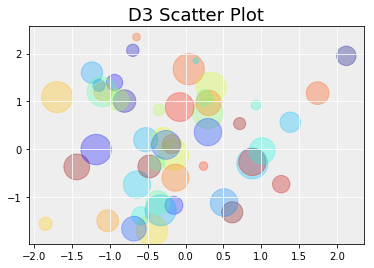

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3

mpld3.enable_notebook()




fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = 50
scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s = 1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)

ax.set_title("D3 Scatter Plot", size=18);

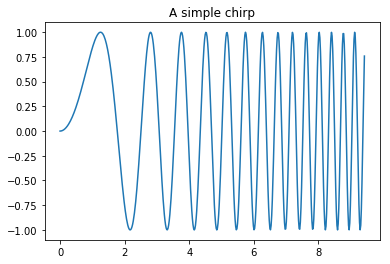

In [4]:
import matplotlib
import numpy as np
from math import sin
import matplotlib.pyplot as plt
%matplotlib inline  

x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp')
plt.show()